# Climate Emergency Project - Preliminary Data Analysis

In [1]:
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for arrays of data
import matplotlib.pyplot as plt # library for plotting data 
from sklearn.linear_model import LinearRegression # library for Linear Regression calculations and analysis
import statsmodels.api as sm # library for Linear Regression calculations and analysis 

### Raw Data for Total Number of Fires from Human Activity in BC from 1990 to 2021

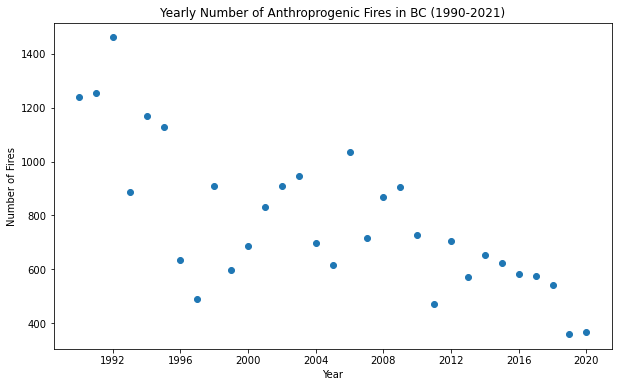

In [2]:
# Load the Human Activity Fires data in BC 
HAFireData = pd . read_csv ( "HumanActivityFires.csv" ,parse_dates=['Year']) 
# X_years: Years , Y_HA: Number of Fires from Human Activity
X_years = HAFireData . index 
Y_HA = HAFireData . iloc [:, 1 ] . to_numpy ()

# plot the raw data of Area Burned data in BC
plt . figure ( figsize = (10 , 6) )
plt . scatter ( HAFireData . iloc [:, 0 ] , Y_HA, label = 'Yearly Number of Anthroprogenic Fires')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Number of Fires' ) 
plt . title ( 'Yearly Number of Anthroprogenic Fires in BC (1990-2021)') 
plt . show ()

### Linear Regression Analysis for Total Number of Fires from Human Activity in BC from 1990 to 2021

FINAL OUTCOMES:
 - HUMAN ACTIVITY FIRES TREND: -21.7
 - HUMAN ACTIVITY FIRES 95% CONFIDENCE INTERVAL: [-29.42331602 -13.97668398]
 - HUMAN ACTIVITY FIRES R^2: 0.53
Y = -21.7 /yr*X + 1000.0


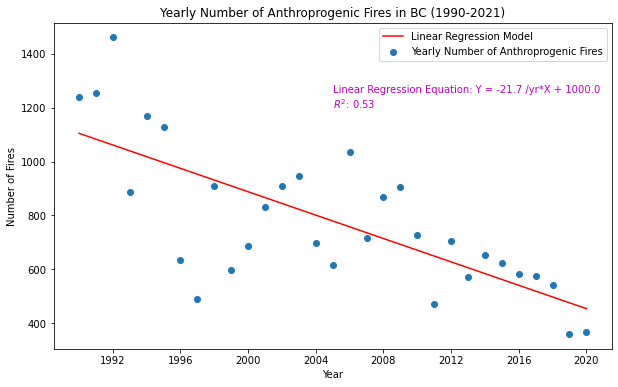

In [3]:
# Load the Human Activity Fires data in BC 
HAFireData = pd . read_csv ( "HumanActivityFires.csv" ,parse_dates=['Year']) 
# X_years: Years , Y_HA: Number of Fires from Human Activity
X_years = HAFireData . index 
Y_HA = HAFireData . iloc [:, 1 ] . to_numpy ()

# Linear regression on the total number of fires in BC time-series using the statsmodel 
# add a column of ones to the x variables (required for statsmodel regression)
X_years = sm.add_constant(X_years)

# fit linear model to training data (drop missing values)
HA_model = sm.OLS(Y_HA, X_years, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, and Rsquare respectively
print('FINAL OUTCOMES:')
HA_trend = round(HA_model.params[1],3)
HA_conf = HA_model.conf_int()[1]
HA_r2 = round(HA_model.rsquared,2)
HA_Yint = round(HA_model.params[0],-3)
print(" - HUMAN ACTIVITY FIRES TREND: " + str(HA_trend))
print(" - HUMAN ACTIVITY FIRES 95% CONFIDENCE INTERVAL: " + str(HA_conf))
print(" - HUMAN ACTIVITY FIRES R^2: " + str(HA_r2))
HA_equation = "Y = " + str(HA_trend) + ' /yr*X + ' + str(HA_Yint)
print(HA_equation)

# Plotting the data and linear regression
plt . figure ( figsize = (10 , 6) )
plt . scatter ( HAFireData . iloc [:, 0 ] , Y_HA, label = 'Yearly Number of Anthroprogenic Fires')
plt.plot(HAFireData . iloc [:, 0 ], HA_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate('Linear Regression Equation: ' + HA_equation + ' \n$R^2$: ' + str(HA_r2) + "\n", xy=(0.5, 0.7), xycoords='axes fraction', color='m')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Number of Fires' ) 
plt . title ( 'Yearly Number of Anthroprogenic Fires in BC (1990-2021)' ) 
plt . legend()
plt . show ()

### Key Findings from Linear Regression Analysis 
- Based on the R^2 value, the Anthropogenic Caused Fires CAN’T be significantly explained by a linear model as it can only predict 53% of the relationship between the Number of Fires and Years
- Total numbers of anthropogenic caused fires are decreasing overtime 

### Raw Data for Total Number of Fires in BC from 1990 to 2021

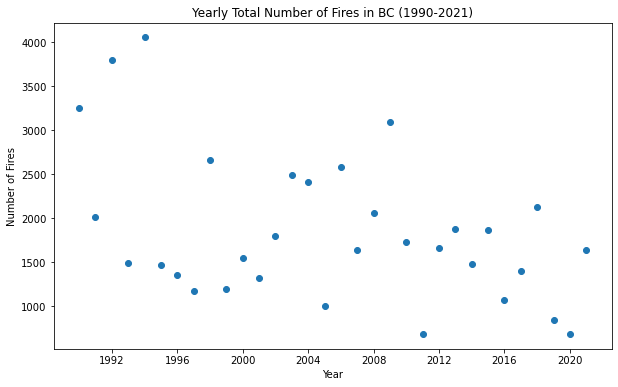

In [4]:
# Loading the Total Number of Fires data in BC 
TotalFireData = pd . read_csv ( "NumberOfFiresOverall.csv" ,parse_dates=['Year'])

# X_year: Years , Y_TotalFires: Total Number of Fires in BC
X_year = TotalFireData . index 
Y_TotalFires = TotalFireData . iloc [:, 1 ] . to_numpy () 

# plot the raw data of Area Burned data in BC
plt . figure ( figsize = (10 , 6) )
plt . scatter ( TotalFireData . iloc [:, 0 ] , Y_TotalFires, label = 'Yearly Total Number of Fires')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Number of Fires' ) 
plt . title ( 'Yearly Total Number of Fires in BC (1990-2021)') 
plt . show ()

### Linear Regression Analysis for Total Number of Fires in BC from 1990 to 2021

FINAL OUTCOMES:
 - TOTAL NUMBER OF FIRES TREND: -39.0
 - TOTAL NUMBER OF FIRES 95% CONFIDENCE INTERVAL: [-68.87214104  -9.25615808]
 - TOTAL NUMBER OF FIRES R^2: 0.19


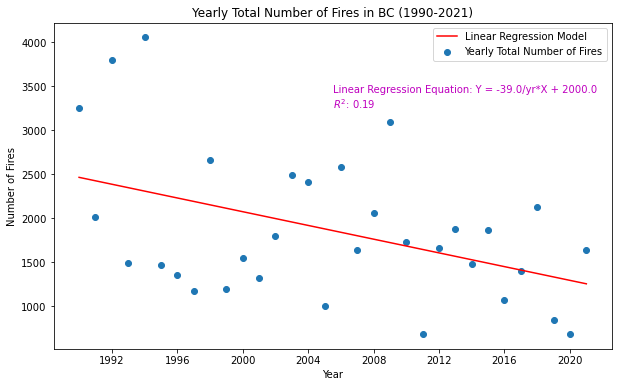

In [5]:
# Loading the Total Number of Fires data in BC 
TotalFireData = pd . read_csv ( "NumberOfFiresOverall.csv" ,parse_dates=['Year'])

# X_year: Years , Y_TotalFires: Total Number of Fires in BC
X_year = TotalFireData . index 
Y_TotalFires = TotalFireData . iloc [:, 1 ] . to_numpy () 

# Linear regression on the total number of fires in BC time-series using the statsmodel 
# add a column of ones to the x variables (required for statsmodel regression)
X_year = sm.add_constant(X_year)

# fit linear model to training data (drop missing values)
totalFires_model = sm.OLS(Y_TotalFires, X_year, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, and Rsquare respectively
totalFires_trend = round(totalFires_model.params[1],0)
totalFires_conf = totalFires_model.conf_int()[1]
totalFires_r2 = round(totalFires_model.rsquared,2)
totalFires_Yint = round(totalFires_model.params[0],-3)
print('FINAL OUTCOMES:')
print(" - TOTAL NUMBER OF FIRES TREND: " + str(totalFires_trend))
print(" - TOTAL NUMBER OF FIRES 95% CONFIDENCE INTERVAL: " + str(totalFires_conf))
print(" - TOTAL NUMBER OF FIRES R^2: " + str(totalFires_r2))
totalFires_equation = "Y = " + str(totalFires_trend) + '/yr*X + ' + str(totalFires_Yint)

# Plotting the data and linear regression
plt . figure ( figsize = (10 , 6) )
plt . scatter ( TotalFireData . iloc [:, 0 ] , Y_TotalFires, label = 'Yearly Total Number of Fires')
plt.plot(TotalFireData . iloc [:, 0 ], totalFires_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate('Linear Regression Equation: ' + totalFires_equation + '\n$R^2$: ' + str(totalFires_r2) + "\n", xy=(0.5, 0.7), xycoords='axes fraction', color='m')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Number of Fires' ) 
plt . title ( 'Yearly Total Number of Fires in BC (1990-2021)' ) 
plt . legend ()
plt . show ()

### Key Findings from Linear Regression Analysis 
- Based on the R^2 value, the Total Number of Fires CAN’T be significantly explained by a linear model as it can only predict 19% of the relationship between the Number of Fires and Years
- Total numbers of fires in BC are decreasing overtime 

### Raw Data for Total Area Burned in Hectares in BC from 1990 to 2021

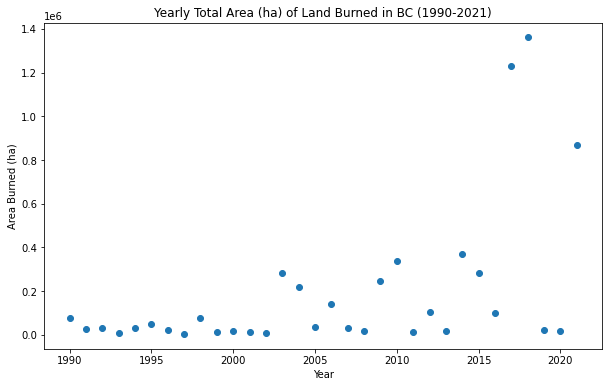

In [6]:
# Loading the Area Burned data in BC
AreaBurnedData = pd . read_csv ( "AreaBurnedOverall.csv" )
# x_time: Years, y_area: Area Burned data in BC
x_time = AreaBurnedData . iloc [:, 0 ] . to_numpy () 
y_area = AreaBurnedData . iloc [:, 1 ] . to_numpy () 
# plot the raw data of Area Burned data in BC
plt . figure ( figsize = (10 , 6) )
plt . scatter ( AreaBurnedData . iloc [:, 0 ] , y_area, label = 'Yearly Total Area (ha) of Land Burned')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Area Burned (ha)' ) 
plt . title ( 'Yearly Total Area (ha) of Land Burned in BC (1990-2021)') 
plt . show ()

### Linear Regression Analysis for Total Area Burned in Hectares in BC from 1990 to 2021

FINAL OUTCOMES:
 - AREA BURNED TREND: 18000.0
 - AREA BURNED 95% CONFIDENCE INTERVAL: [ 6927.44260582 30043.67946163]
 - AREA BURNED R^2: 0.26


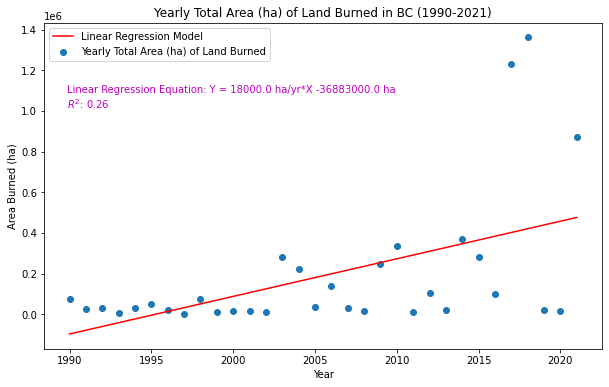

In [7]:
# Loading the Area Burned data in BC 
AreaBurnedData = pd . read_csv ( "AreaBurnedOverall.csv" )
# x_time: Years, y_area: area burned in BC
x_time = AreaBurnedData . iloc [:, 0 ] . to_numpy () 
y_area = AreaBurnedData . iloc [:, 1 ] . to_numpy () 

# Linear regression on the total Area Burned  in BC time-series using the statsmodel 
# add a column of ones to the x variables (required for statsmodel regression)
x_time = sm.add_constant(x_time)

# fit linear model to training data (drop missing values)
areaBurned_model = sm.OLS(y_area, x_time, missing='drop').fit()

# create variables for the trend, 95% confidence intervals, and Rsquare respectively
areaBurned_trend = round(areaBurned_model.params[1],-3)
areaBurned_conf = areaBurned_model.conf_int()[1]
areaBurned_r2 = round(areaBurned_model.rsquared,2)
areaBurned_Yint = round(areaBurned_model.params[0],-3)
print('FINAL OUTCOMES:')
print(" - AREA BURNED TREND: " + str(areaBurned_trend))
print(" - AREA BURNED 95% CONFIDENCE INTERVAL: " + str(areaBurned_conf))
print(" - AREA BURNED R^2: " + str(areaBurned_r2))
areaBurned_equation = "Y = " + str(areaBurned_trend) + ' ha/yr*X ' + str(areaBurned_Yint) + " ha"

# Plotting the data and linear regression
plt . figure ( figsize = (10 , 6) )
plt . scatter ( AreaBurnedData . iloc [:, 0 ] , y_area, label = 'Yearly Total Area (ha) of Land Burned')
plt.plot(AreaBurnedData . iloc [:, 0 ], areaBurned_model.fittedvalues,color ='r', label = 'Linear Regression Model')
# annotate the plot with the trend and R^2
plt.annotate('Linear Regression Equation: ' + areaBurned_equation + '\n$R^2$: ' + str(areaBurned_r2) + "\n", xy=(0.04, 0.7), xycoords='axes fraction', color='m')
plt . xlabel ( 'Year' ) 
plt . ylabel ( 'Area Burned (ha)' ) 
plt . title ( 'Yearly Total Area (ha) of Land Burned in BC (1990-2021)') 
plt . legend()
plt . show ()

### Key Findings from Linear Regression Analysis 
- Based on the R^2 value, the Total Area Burned in Hectares in BC CAN’T be significantly explained by a linear model as it can only predict 26% of the relationship between the Total Hectares Burned and Years
- Total area of hectares burned in BC is increasing overtime 